In [1]:
# Menghubungkan ke Google Drive
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#menyiapkan directory
base_dir = '/content/drive/My Drive/projek pcd'
!ls "/content/drive/My Drive/projek pcd"


 bahan	 latih	'source code'   validasi


In [3]:
#menentukan direktori
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validasi_dir = os.path.join(base_dir, 'validasi')


In [4]:
#menentukan direktori isi bahan
jahe_dir = os.path.join(bahan_dir, 'jahe/')
kencur_dir = os.path.join(bahan_dir, 'kencur/')
lengkuas_dir = os.path.join(bahan_dir, 'lengkuas/')

print("Jumlah data tiap kelas")
print('Jumlah gambar jahe : ', len(os.listdir(jahe_dir)))
print('Jumlah gambar kencur : ', len(os.listdir(kencur_dir)))
print('Jumlah gambar lengkuas : ', len(os.listdir(lengkuas_dir)))


Jumlah data tiap kelas
Jumlah gambar jahe :  100
Jumlah gambar kencur :  100
Jumlah gambar lengkuas :  100


In [5]:
#menentukan direktori isi latih
train_jahe = os.path.join(train_dir, 'jahe/')
train_kencur = os.path.join(train_dir, 'kencur/')
train_lengkuas = os.path.join(train_dir, 'lengkuas/')

#menentukan direktori isi validasi
validasi_jahe = os.path.join(validasi_dir, 'jahe/')
validasi_kencur = os.path.join(validasi_dir, 'kencur/')
validasi_lengkuas = os.path.join(validasi_dir, 'lengkuas/')

print("Jumlah data latih tiap kelas")
print('Jumlah gambar jahe : ', len(os.listdir(train_jahe)))
print('Jumlah gambar kencur : ', len(os.listdir(train_kencur)))
print('Jumlah gambar lengkuas : ', len(os.listdir(train_lengkuas)))

print("Jumlah data validasi tiap kelas")
print('Jumlah gambar jahe : ', len(os.listdir(validasi_jahe)))
print('Jumlah gambar kencur : ', len(os.listdir(validasi_kencur)))
print('Jumlah gambar lengkuas : ', len(os.listdir(validasi_lengkuas)))

Jumlah data latih tiap kelas
Jumlah gambar jahe :  90
Jumlah gambar kencur :  90
Jumlah gambar lengkuas :  90
Jumlah data validasi tiap kelas
Jumlah gambar jahe :  10
Jumlah gambar kencur :  10
Jumlah gambar lengkuas :  10


In [6]:
import requests

r = requests.get("http://google.com")
print(r.status_code)

200


In [7]:
!pip install --upgrade tensorflow
!pip install --upgrade jax jaxlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.23+cuda12.cudnn89
    Uninstalling jaxlib-0.4.23+cuda12.cudnn89:
      Successfully uninstalled jaxlib-0.4.23+cuda12.cudnn89
  Attempting uninstall: jax
    Found existing installation: jax 0.4.23
    Uninstalling jax-0.4.23:
      Successfully uninstalled jax-0.4.23


In [8]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**pre processing**

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)
val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

**Target**

In [10]:
train_generator = train_datagen. flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical'
)
val_generator = val_datagen. flow_from_directory(
    validasi_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical'
)


Found 270 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.97):
      print('\nAkurasi mencapai 97%')
      self.model.stop_training = True

callbacks = myCallback()

ketika data diproses dan sampai akurasi 97% maka pemrosesan datanya stop meskipun iterasi belum selesai

**Model CNN**

In [12]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=9,
    epochs = 25,
    validation_data = val_generator,
    validation_steps = 1,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/25
9/9 [==============================] - 79s 8s/step - loss: 1.0502 - accuracy: 0.4833 - val_loss: 0.7515 - val_accuracy: 0.6000
Epoch 2/25
9/9 [==============================] - 32s 4s/step - loss: 0.5646 - accuracy: 0.7235 - val_loss: 0.2084 - val_accuracy: 1.0000
Epoch 3/25
9/9 [==============================] - 30s 3s/step - loss: 0.4692 - accuracy: 0.7882 - val_loss: 0.1844 - val_accuracy: 0.9500
Epoch 4/25
9/9 [==============================] - 27s 3s/step - loss: 0.3066 - accuracy: 0.8706 - val_loss: 0.1060 - val_accuracy: 1.0000
Epoch 5/25
9/9 [==============================] - 29s 3s/step - loss: 0.2438 - accuracy: 0.9353 - val_loss: 0.0884 - val_accuracy: 1.0000
Epoch 6/25
9/9 [==============================] - ETA: 0s - loss: 0.1363 - accuracy: 0.9722
Akurasi mencapai 97%
9/9 [==============================] - 29s 3s/step - loss: 0.1363 - accuracy: 0.9722 - val_loss: 0.0331 - val_accuracy: 1.0000


tingkat akurasi dan lose model

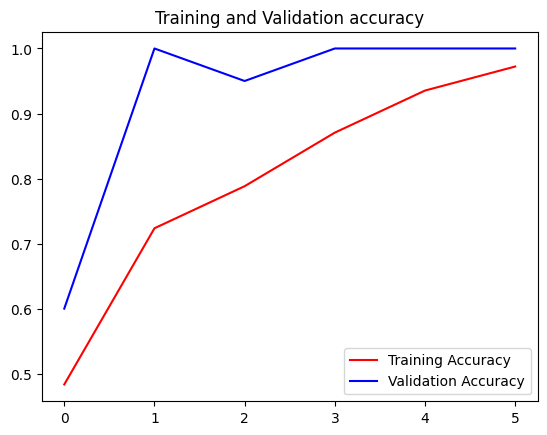

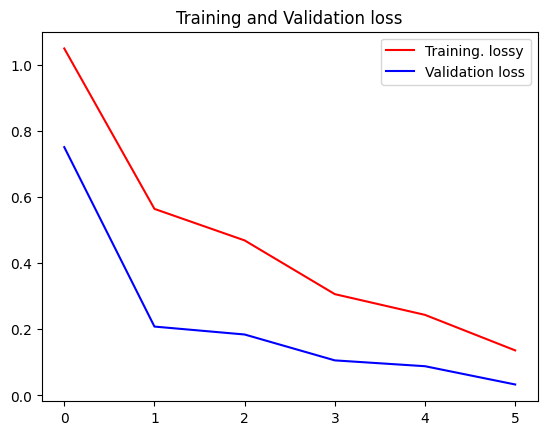

In [16]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range (len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training. lossy')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend(loc = 'best')
plt.show()

mencoba model

Saving shutterstock_127542449.jpg to shutterstock_127542449.jpg
1/1 [==============================] - 0s 139ms/step
shutterstock_127542449.jpg
this image belongs to class jahe


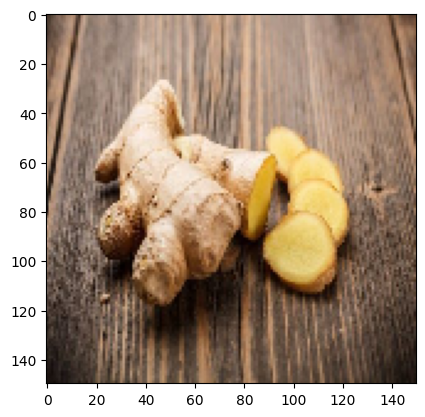

In [17]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  #predicing image
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print (fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1 :
      print('this image belongs to class', class_list[j])
      break


Saving lengkuas.jpg to lengkuas.jpg
1/1 [==============================] - 0s 35ms/step
lengkuas.jpg
this image belongs to class lengkuas


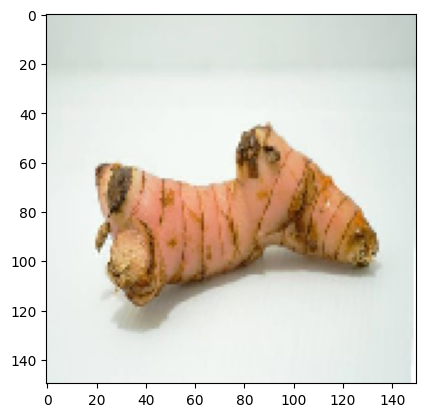

In [18]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  #predicing image
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print (fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1 :
      print('this image belongs to class', class_list[j])
      break


Saving Salinan 20231029_133817.jpg to Salinan 20231029_133817.jpg
1/1 [==============================] - 0s 34ms/step
Salinan 20231029_133817.jpg
this image belongs to class kencur


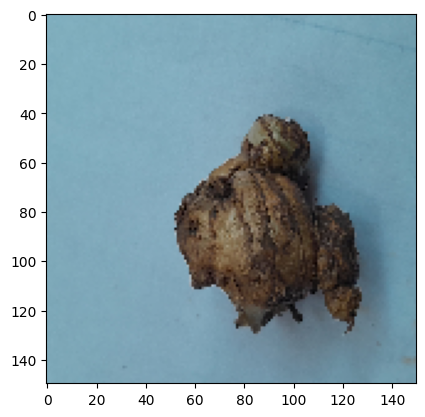

In [19]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  #predicing image
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print (fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1 :
      print('this image belongs to class', class_list[j])
      break
